In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_excel("iris.xls")

In [3]:
ds.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ds.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
ds.shape

(150, 5)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ds.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
a = ds["SL"].mean()
ds['SL'].fillna(a,inplace=True)

b = ds["SW"].mean()
ds['SW'].fillna(b,inplace=True)

c = ds["PL"].mean()
ds['PL'].fillna(c,inplace=True)

In [9]:
ds.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
ds.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [12]:
ds.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20000,2.3,Iris-virginica
146,6.3,2.5,5.00000,1.9,Iris-virginica
147,6.5,3.0,3.75625,2.0,Iris-virginica
148,6.2,3.4,5.40000,2.3,Iris-virginica
149,5.9,3.0,5.10000,1.8,Iris-virginica


In [13]:
#Convert categorical values into numerical
from sklearn.preprocessing import LabelEncoder
from scipy import stats

le=LabelEncoder()
ds['Classification']=le.fit_transform(ds['Classification'])
ds

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [14]:
ds['Classification'].unique()

array([0, 1, 2])

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [36]:
y=ds['Classification']
x=ds.drop(['Classification'],axis=1)

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [39]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Accuracy = ',accuracy_score(y_test,y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision = ', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy =  1.0
Precision =  1.0
Recall score: 1.0
F1 score: 1.0


In [42]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [43]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [44]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [46]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

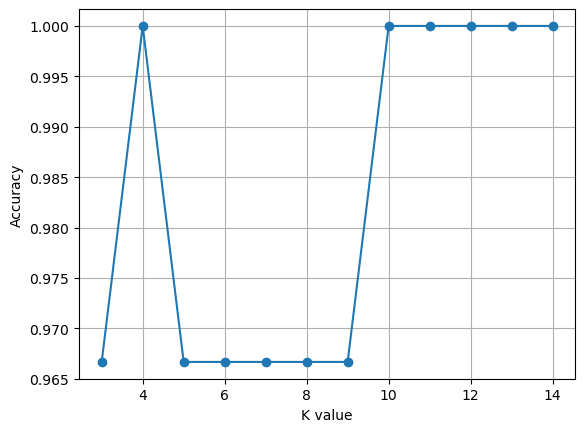

In [47]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [55]:
print('Accuracy = ',accuracy_score(y_test,y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision = ', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy =  1.0
Precision =  1.0
Recall score: 1.0
F1 score: 1.0


In [52]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)